In [713]:
import autograd.numpy as np
from autograd import grad
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import glob
from PIL import Image

In [714]:
# def easy(x):
#     y = x**2
#     return y


In [715]:
# # Create a function to compute the gradient
# grad_tanh = grad(easy)

In [716]:
# # Evaluate the gradient at x = 1.0
# print(grad_tanh(1.0))

In [717]:
# def tanh(x):
#     y = np.exp(-x)
#     return (1.0 - y) / (1.0 + y)

In [718]:
# def fun(x):
#     currterm = x
#     ans = currterm
#     for i in range(1000):
#         print(i, end=' ')
#         currterm = - currterm * x ** 2 / ((2 * i + 3) * (2 * i + 2))
#         ans = ans + currterm
#         if np.abs(currterm) < 0.2:
#             break
#     return ans

# d_fun = grad(fun)
# dd_fun = grad(d_fun) # Second-order gradient

# print(d_fun(10.0))

In [719]:
# # a simple multi-input function defined in python 
# def g(w_1,w_2):
#     return np.tanh(w_1*w_2)

In [720]:
# # compute the gradient of our input function
# dgdw1 = grad(g,0)
# dgdw2 = grad(g,1)

In [721]:
# construct all partial derivative functions at once
# nabla_g = grad(g,(0,1))

In [722]:

# # Define the data points
# x = [1, 9, 0, 7, 10, 4, 11]
# y1 = [5, 21, 3, 17, 23, 11, 25]
# y2 = [6, 22, 4, 18, 24, 12, 26]

# # Plot the data points for y1
# plt.plot(x, y1, marker='o', linestyle='-', color='b', label='Line 1')

# # Plot the data points for y2
# plt.plot(x, y2, marker='o', linestyle='-', color='r', label='Line 2')

# # Add labels and title
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Line Graph')
# plt.legend()

# # Show plot
# plt.grid(True)
# plt.show()

In [723]:
train = pd.read_excel('Datas.xlsx')
x = train['Size']
x = np.array(x)
y = train['Price']
y= np.array(y)

In [724]:
def J(w,b,xi,yi):
    return np.square(yi - (w * xi) - b )

In [725]:
def propagate(w,b):
    dw = 0
    db = 0
    loss = 0 
    for xi, yi in zip(x, y):
        dJdw = grad(J,0)
        dJdb = grad(J,1)
        dw += dJdw(w,b,xi,yi)
        db += dJdb(w,b,xi,yi)
        loss += J(w,b,xi,yi) 
    # print(dw)
    # print(db)
    # print(loss)
    return dw, db, loss

In [726]:
def gif_generator():
    fp_in = "E:\\4th year, 1st semester\\ML lab\\*.png"
    fp_out = "curve_fitting_sig.gif"

    natsort = lambda s: [int(t) if t.isdigit() else t.lower() for t in re.split('(\d+)', s)]

    # # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
    img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in), key=natsort)]
    img.save(fp=fp_out, format='GIF', append_images=imgs,
            save_all=True, duration=200, loop=0)
    return

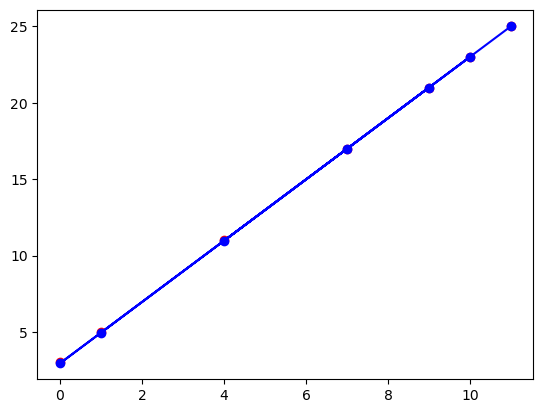

In [727]:
w = 0.047
b = 0.047
lr = 0.001
iteation = 1000

output = pd.read_excel('Output.xlsx')
loss_values = []

plt.scatter(x, y, color='r', label='Main Line')
aux_line, = plt.plot([], [], marker='o', linestyle='-', color='b', label='Line')
for p in range(iteation):
    dw ,db, loss = propagate(w,b)
    w = w - (lr * dw)
    b = b - (lr * db)
    loss_values.append(loss)
    # print(w)
    # print(b)
   
    if(p % 100 == 0):
        y2 = w * x + b
        aux_line.set_data(x, y2)
        plt.savefig(f'{p}.png',dpi=300)

output['Loss'] = loss_values
output.to_excel('Output.xlsx', index=False)

gif_generator()